<h1>Regressão Linear Simples</h1>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

Criando Base de Dados

In [2]:
data = np.array([[45,55,55,55,55,65,65,65,65,65,65,75,75,75,75,75,75,85,85,85,85,85,85,95,95,95,95],
                 [52,54,63,60,62,57,72,77,80,61,75,62,77,91,71,89,70,89,93,97,74,80,66,94,97,83,95]]).T
data = pd.DataFrame(data = data, columns = ['x', 'y'] )
data.head()

,x,y
0,45,52
1,55,54
2,55,63
3,55,60
4,55,62


Plotando grafico de dispressão

Text(0.5, 1.0, 'Grafico de Dispressão entre X e Y')

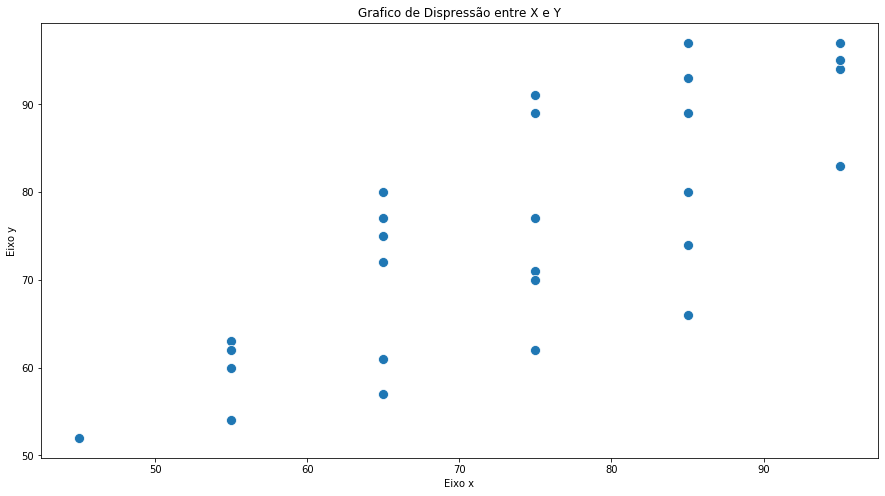

In [3]:
plt.figure(figsize=(15,8))
fig = sns.scatterplot(x = 'x', y = 'y', data = data, s = 100)
fig.set_xlabel('Eixo x')
fig.set_ylabel('Eixo y')
fig.set_title('Grafico de Dispressão entre X e Y')

Estimando Betas

In [4]:
X = sm.add_constant(data['x'])
modelo = sm.OLS(data['y'], X)
type(modelo)

C:\Users\Gabriel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


statsmodels.regression.linear_model.OLS

In [5]:
estimativas = modelo.fit()
type(estimativas)

statsmodels.regression.linear_model.RegressionResultsWrapper

Vamos focar em alguns desse parametros. Sendo estes:
* summary() -> Retorna um resumo com varias estatiscas e informações uteis;
* params -> Retorna as estimativas dos betas;
* rsquared -> Retorna o R^2;
* rsquared_adj -> Retorna o R^2 ajustado;
* pvalues -> Retorna os pvalores do teste T;
* predict -> Retorna os valores de Y chapeu;
* tvalues -> Retorna as estatisticas de teste do teste T;
* summary2 -> Retorna um summary() mas com algumas pequenas diferenças.

In [6]:
print(estimativas.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     39.76
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.34e-06
Time:                        15:41:53   Log-Likelihood:                -96.330
No. Observations:                  27   AIC:                             196.7
Df Residuals:                      25   BIC:                             199.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3833      9.234      1.991      0.0

In [7]:
estimativas.params

const    18.383263
x         0.774262
dtype: float64

In [8]:
estimativas.rsquared

0.6139534061106071

In [9]:
estimativas.rsquared_adj

0.5985115423550313

In [10]:
estimativas.pvalues

const    0.057528
x        0.000001
dtype: float64

In [11]:
estimativas.predict(X).head()

0    53.225035
1    60.967651
2    60.967651
3    60.967651
4    60.967651
dtype: float64

In [12]:
estimativas.tvalues

const    1.990905
x        6.305476
dtype: float64

In [13]:
print(estimativas.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.599   
Dependent Variable: y                AIC:                196.6596
Date:               2019-11-20 15:41 BIC:                199.2513
No. Observations:   27               Log-Likelihood:     -96.330 
Df Model:           1                F-statistic:        39.76   
Df Residuals:       25               Prob (F-statistic): 1.34e-06
R-squared:          0.614            Scale:              79.410  
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      18.3833     9.2336   1.9909   0.0575   -0.6337   37.4003
x           0.7743     0.1228   6.3055   0.0000    0.5214    1.0272
-----------------------------------------------------------------
Omnibus:               0.936        Durbin-Watson:          2.378
Prob(Omnibus):   

(35, 90)

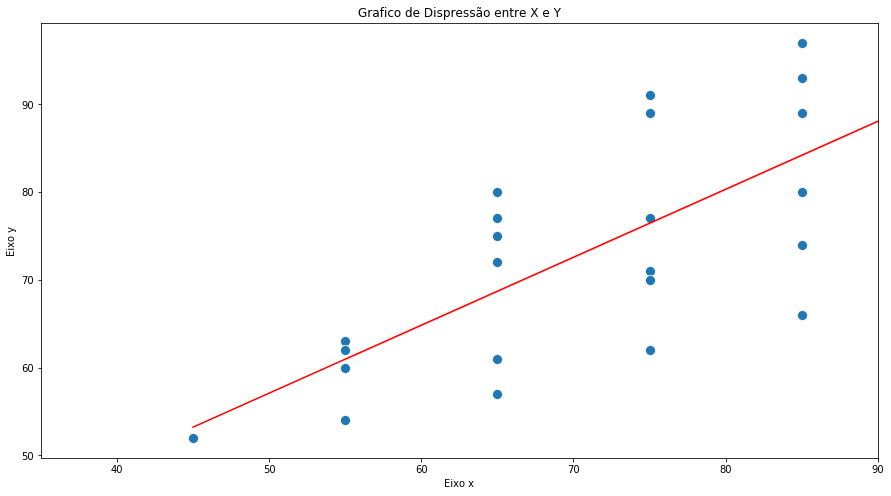

In [14]:
data['Ychapeu'] = estimativas.predict(X)
fig, axes = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'x', y = 'y', data = data, s = 100)
sns.lineplot(x = 'x', y = 'Ychapeu', data = data, color = 'red')
axes.set_xlabel('Eixo x')
axes.set_ylabel('Eixo y')
axes.set_title('Grafico de Dispressão entre X e Y')
axes.set_xlim(35, 90)

<h2>Analisando os Residuos</h2>

In [15]:
estimativas.resid.head() # Residuos burtos

0   -1.225035
1   -6.967651
2    2.032349
3   -0.967651
4    1.032349
dtype: float64

Text(0.5, 1.0, 'Grafico de Dispressão entre x e residuos')

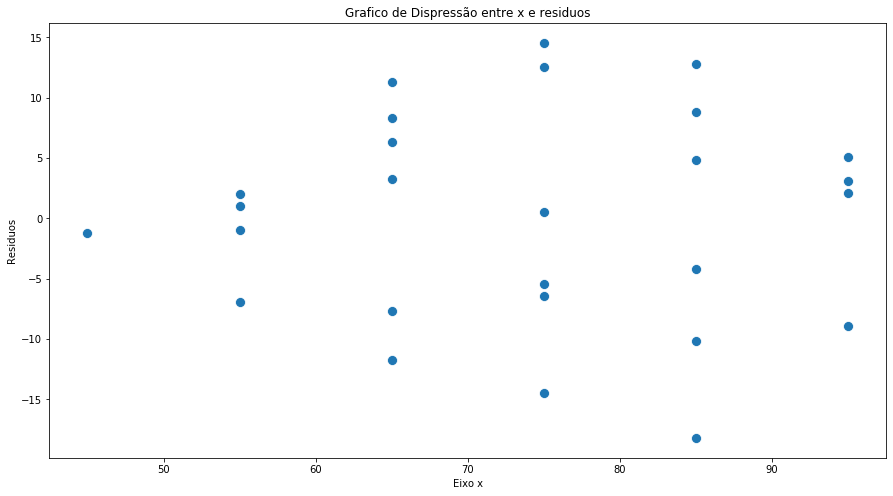

In [16]:
fig, axes = plt.subplots(figsize=(15,8))
sns.scatterplot(x = data['x'], y = estimativas.resid, s = 100)
axes.set_xlabel('Eixo x')
axes.set_ylabel('Residuos')
axes.set_title('Grafico de Dispressão entre x e residuos')

**Obtendo as SQres, SQreg e SQtot.**

O metodo anova = sm.stats.anova_lm(estimativas, type=2) seria uma alternativa mas não sera possivel usar por algum erro do pacote. Para usarmos temos q fazer algumas alterações

In [17]:
MQres = estimativas.mse_resid
MQtot = estimativas.mse_total
MQreg = estimativas.mse_model
print(f'MQres = {MQres}, MQresg = {MQreg} e MQtot = {MQtot}')

MQres = 79.41007032348803, MQresg = 3157.2667604313174 e MQtot = 197.7891737891738


In [18]:
ei_student = estimativas.get_influence().resid_studentized_internal

O metodo .get_influence() tbm é usado para obter a distancia de Cook.

In [19]:
estimativas.fvalue

39.75902234527371

In [20]:
estimativas.f_pvalue

1.342567548883251e-06

<h2>Normalidade</h2>

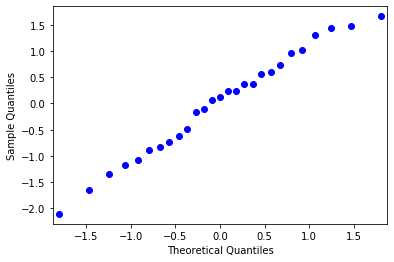

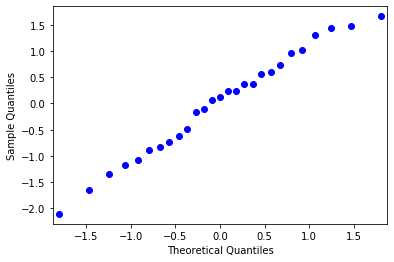

In [21]:
sm.qqplot(ei_student)

In [22]:
stats.shapiro(ei_student)

(0.9770492911338806, 0.7905247211456299)

Tem como retorno a estatistica de teste e pvalor, nesta ordem.

<h2>Usando outro modulo</h2>

Nesse outro método vamos achar as mesma coisas, porem neste método temos uma forma mais rapida de fazer ANOVA

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf # Esta é a diferença.
from scipy import stats
%matplotlib inline

In [24]:
data = np.array([[45,55,55,55,55,65,65,65,65,65,65,75,75,75,75,75,75,85,85,85,85,85,85,95,95,95,95],
                 [52,54,63,60,62,57,72,77,80,61,75,62,77,91,71,89,70,89,93,97,74,80,66,94,97,83,95]]).T
data = pd.DataFrame(data = data, columns = ['x', 'y'] )
data.head()

,x,y
0,45,52
1,55,54
2,55,63
3,55,60
4,55,62


In [25]:
modelo2 = smf.ols('y ~ x', data = data)

In [26]:
estimativas2 = modelo2.fit()

In [27]:
print(estimativas2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     39.76
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.34e-06
Time:                        15:41:54   Log-Likelihood:                -96.330
No. Observations:                  27   AIC:                             196.7
Df Residuals:                      25   BIC:                             199.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3833      9.234      1.991      0.0

In [28]:
sm.stats.anova_lm(estimativas2, typ=1) # typ modifica a forma como o é mostrado as saida

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,3157.266760,3157.26676,39.759022,0.000001
Residual,25.0,1985.251758,79.41007,NaN,NaN


In [29]:
estimativas2.params

Intercept    18.383263
x             0.774262
dtype: float64

In [30]:
estimativas2.rsquared

0.6139534061106071

In [31]:
estimativas2.rsquared_adj

0.5985115423550313

In [32]:
estimativas2.pvalues

Intercept    0.057528
x            0.000001
dtype: float64

In [33]:
estimativas2.tvalues

Intercept    1.990905
x            6.305476
dtype: float64

In [34]:
estimativas2.resid.head()

0   -1.225035
1   -6.967651
2    2.032349
3   -0.967651
4    1.032349
dtype: float64

In [35]:
estimativas2.fvalue

39.75902234527371

In [36]:
estimativas.f_pvalue

1.342567548883251e-06

<h2>Analisando os Residuos</h2>

In [37]:
MQres = estimativas2.mse_resid
MQtot = estimativas2.mse_total
MQreg = estimativas2.mse_model
print(f'MQres = {MQres}, MQresg = {MQreg} e MQtot = {MQtot}')

MQres = 79.41007032348803, MQresg = 3157.2667604313174 e MQtot = 197.7891737891738


In [38]:
ei_estudent2 = estimativas2.get_influence().resid_studentized_internal

O metodo .get_influence() tbm é usado para obter a distancia de Cook.

In [39]:
estimativas2.fvalue

39.75902234527371

In [40]:
estimativas2.f_pvalue

1.342567548883251e-06

<h2>Normalidade</h2>

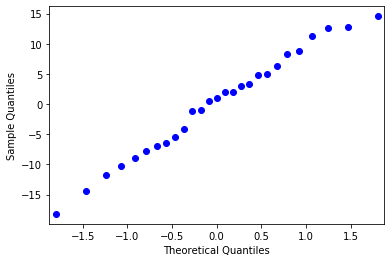

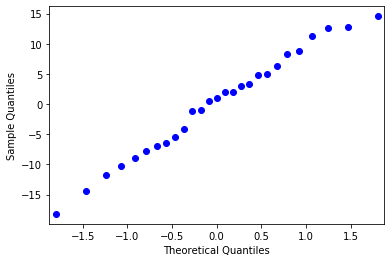

In [41]:
sm.qqplot(estimativas2.resid)

In [42]:
stats.shapiro(ei_estudent2)

(0.9770492911338806, 0.7905247211456299)

<h1>Regressão Linear Multipla</h1>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf # Esta é a diferença.

Preparando base de dados, para a analise. Esse primeira base será usada, somente, para avaliar **MULTICOLINEARIDADE** e mostrar os comandos basicos.

<h3>Comandos Basicos</h3>

In [44]:
data = np.array([[17,6,13,11,23,16,15,5,10,12,20,12,8,8], 
        [35.7,11.4,28.6,25.8,50.6,27.2,31.3,10.0,18.9,25.2,39.9,32.5,13.6,19.0], 
        [52.1,24.6,49.2,30.0,82.2,42.4,55.7,21.1,27.7,36.3,69.1,38.8,22.8,34.7]]).T
data = pd.DataFrame(data = data, columns = ['npublic', 'tempexp', 'desemp'] )

In [45]:
data.head()

,npublic,tempexp,desemp
0,17.0,35.7,52.1
1,6.0,11.4,24.6
2,13.0,28.6,49.2
3,11.0,25.8,30.0
4,23.0,50.6,82.2


In [46]:
modelo = smf.ols('desemp~npublic+tempexp', data = data)

In [47]:
estimativas3 = modelo.fit()
print(estimativas3.summary())

                            OLS Regression Results                            
Dep. Variable:                 desemp   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     54.07
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.04e-06
Time:                        15:41:54   Log-Likelihood:                -43.189
No. Observations:                  14   AIC:                             92.38
Df Residuals:                      11   BIC:                             94.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7259      4.298      0.169      0.8

C:\Users\Gabriel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [48]:
ei_estudent3 = estimativas3.get_influence().resid_studentized_internal
ei_estudent3

array([-0.77234356,  0.9466858 ,  0.8768086 , -1.5460663 ,  1.00460098,
       -1.38984664,  1.04923922,  0.8312377 , -0.77804346, -0.64892176,
        0.83726855, -1.42664738, -0.36653532,  1.15068795])

In [49]:
sm.stats.anova_lm(estimativas3, typ=1) # Igual ao R, ou seja, usa soma dos quadros extras

,df,sum_sq,mean_sq,F,PR(>F)
npublic,1.0,3790.508396,3790.508396,106.390526,5.420407e-07
tempexp,1.0,62.330125,62.330125,1.749458,2.127840e-01
Residual,11.0,391.910764,35.628251,NaN,NaN


In [50]:
sm.stats.anova_lm(estimativas3, typ=2) 

,sum_sq,df,F,PR(>F)
npublic,95.294412,1.0,2.674687,0.130220
tempexp,62.330125,1.0,1.749458,0.212784
Residual,391.910764,11.0,NaN,NaN


In [51]:
MQres = estimativas3.mse_resid
MQtot = estimativas3.mse_total
MQreg = estimativas3.mse_model
print(f'MQres = {MQres}, MQreg = {MQreg} e MQtot = {MQtot}')

MQres = 35.62825128100215, MQreg = 1926.4192608116316 e MQtot = 326.51917582417593


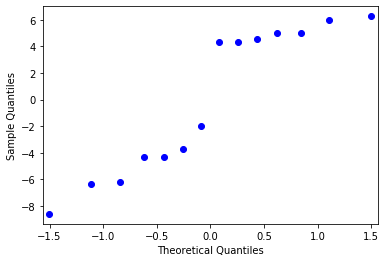

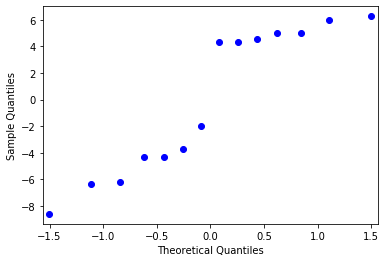

In [52]:
sm.qqplot(estimativas3.resid)

In [53]:
stats.shapiro(ei_estudent3)

(0.8287656903266907, 0.011580933816730976)

<h3>Multicolinearidade</h3>

**Importando pacote para fazer vif**

In [54]:
np.corrcoef([data.iloc[:,0], data.iloc[:,1], data.iloc[:,2]]) # Matriz de correlação.

array([[1.        , 0.95953171, 0.9449802 ],
       [0.95953171, 1.        , 0.9408622 ],
       [0.9449802 , 0.9408622 , 1.        ]])

In [55]:
data = pd.DataFrame(data = data, columns = ['npublic', 'tempexp', 'desemp'] ) # So estou colocando para quando rodar no dar erro
from statsmodels.stats.outliers_influence import variance_inflation_factor
del data['desemp']
X = data.assign(const=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
del vif[-1]
vif
data = pd.DataFrame(data = data, columns = ['npublic', 'tempexp', 'desemp'] )
# Colocando de volta y.
vif

[12.610515486461152, 12.610515486461134]

<h3>Heterocedasticidade</h3>

In [56]:
data = np.array([[294,247,267,358,423,311,450,534,438,697,688,630,709,627,615,999,1022,
          1015,700,850,980,1025,1021,1200,1250,1500,1650], 
         [30,32,37,44,47,49,56,62,68,78,80,84,88,97,100,109,114,117,106,128,
            130,160,97,180,112,210,135]]).T
data = pd.DataFrame(data = data, columns = ['ntrab_X', 'nsuperv_Y'] )
modelo = smf.ols('nsuperv_Y~ntrab_X', data = data)
estimativas = modelo.fit()
data.head()

,ntrab_X,nsuperv_Y
0,294,30
1,247,32
2,267,37
3,358,44
4,423,47


**Teste de White**

Retorna alguns valores mas os valors que importam são dois primeiro, sendo o primeiro a estatistiva e o segundo o pvalor

In [57]:
import statsmodels.stats.api as sms
sms.het_white(estimativas.resid, estimativas.model.exog)

(21.134482385631244,
 2.5745744856118243e-05,
 43.23809172549363,
 1.1048694110790664e-08)

Outra forma de fazer o Teste de White

In [58]:
data2 = data.copy()
data2['ntrab_X2'] = data2['ntrab_X'] ** 2
data2['ei2'] = estimativas.resid ** 2
data2.head()

,ntrab_X,nsuperv_Y,ntrab_X2,ei2
0,294,30,86436,237.906565
1,247,32,61009,71.778998
2,267,37,71289,31.130492
3,358,44,128164,66.705281
4,423,47,178929,144.379478


In [59]:
modelo = smf.ols('ei2 ~ ntrab_X + ntrab_X2', data = data2)
estimativas = modelo.fit()
estimativas.rsquared

0.7827586068752312

In [60]:
n = data2.shape[0]
wobs = estimativas.rsquared * n
pvalor = 1 - stats.chi2.cdf(wobs, df = 2)
print(f'Estatistica observada: {wobs} e pvalor: {pvalor}')

Estatistica observada: 21.134482385631244 e pvalor: 2.574574485614267e-05


<h3>Valores Influentes</h3>

In [61]:
data = np.array([[5,3,4,4,7,5,5,1,2,2,7,3.50,2,4,9,8,9.50,9,9,8],
       [36,21,29,26,38,35,32,20,25,30,40,31,23,22,40,39,42,40,40,36],
       [17,10,13,11,23,16,15,8,10,12,20,12,8,8,20,24,26,25,25,23],
       [5.40,2.40,4.90,3.20,8.20,4.20,5.60,2.10,2.80,3.60,6.90,3.90,2.30,3.50,9.00,8.50,10.00,9.20,9.00,8.20]]).T
data = pd.DataFrame(data = data, columns = ['notav1', 'tempoteo', 'tempoexs', 'notav2_Y'])
data['tempototal'] = data['tempoteo'] + data['tempoexs']
del data['tempoteo']
del data['tempoexs']
data.head()

,notav1,notav2_Y,tempototal
0,5.0,5.4,53.0
1,3.0,2.4,31.0
2,4.0,4.9,42.0
3,4.0,3.2,37.0
4,7.0,8.2,61.0


In [62]:
modelo = smf.ols('notav2_Y ~ notav1 + tempototal', data = data)
estimativas = modelo.fit()
influentes = estimativas.get_influence()

In [63]:
(dist_cook, pvalor) = influentes.cooks_distance
resid_est = influentes.resid_studentized

Text(0.5, 1.0, 'Grafico de Dispressão entre x e residuos')

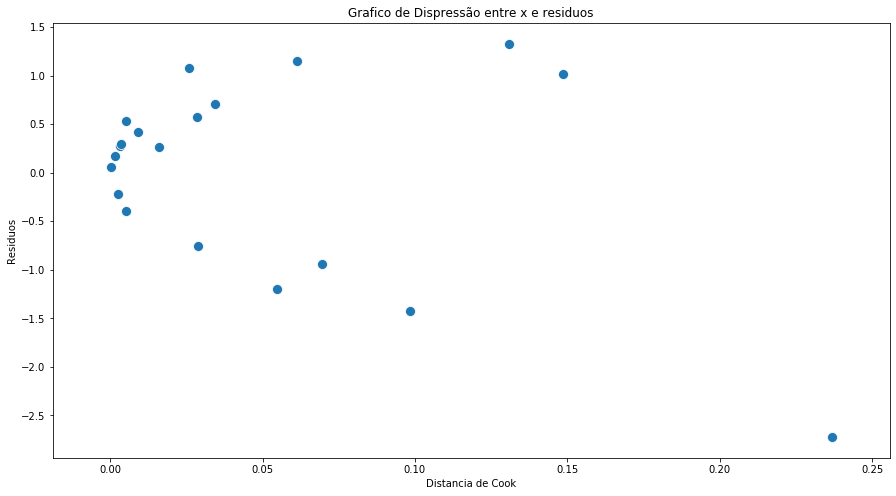

In [64]:
fig, axes = plt.subplots(figsize=(15,8))
sns.scatterplot(x = dist_cook, y = resid_est, s = 100)
axes.set_xlabel('Distancia de Cook')
axes.set_ylabel('Residuos')
axes.set_title('Grafico de Dispressão entre x e residuos')

In [65]:
influentes.summary_frame().head() # Obtendo muitas diversas medidas

,dfb_Intercept,dfb_notav1,dfb_tempototal,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.167536,0.220939,-0.227762,0.028842,-0.753189,0.132339,-0.294152,-0.743206,-0.290254
1,-0.420507,-0.236647,0.332351,0.069544,-0.945779,0.189128,-0.456764,-0.942677,-0.455266
2,0.107326,-0.028470,-0.017923,0.026021,1.078362,0.062908,0.279400,1.083892,0.280833
3,-0.492494,-0.307609,0.397996,0.098219,-1.430159,0.125921,-0.542824,-1.479300,-0.561476
4,-0.272260,-0.204755,0.285231,0.061457,1.155651,0.121305,0.429385,1.167962,0.433959


In [66]:
type(influentes.summary_frame())

pandas.core.frame.DataFrame

Text(0, 0.5, 'Hii centrada')

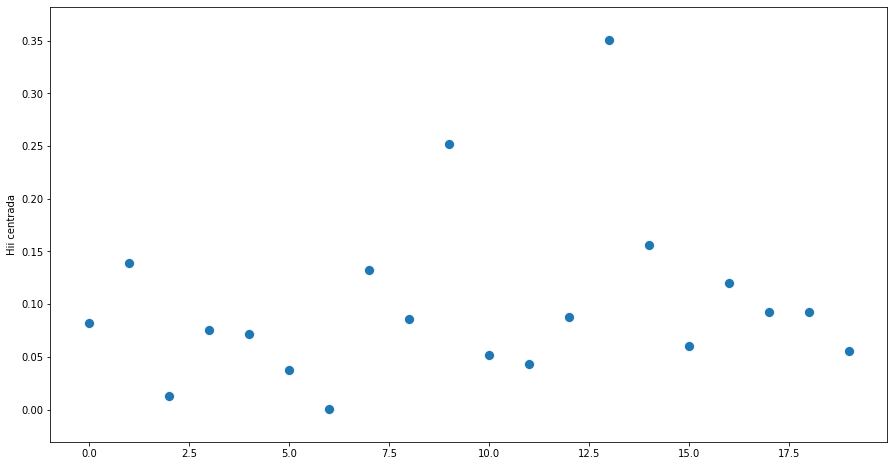

In [67]:
fig, axes = plt.subplots(figsize=(15,8))
n = data.shape[0]
sns.scatterplot(y = influentes.summary_frame()['hat_diag'] - 1/n,
                x = list(range(0, len(influentes.summary_frame()['hat_diag']))) , s = 100)
axes.set_ylabel('Hii centrada')

In [68]:
influentes.summary_table() # Obtendo muitas diversas medidas

obs,endog,fitted,Cook's,student.,hat diag,dffits,ext.stud.,dffits
,,value,d,residual,,internal,residual,
0.0,5.4,5.7853764457019095,0.028841858318812696,-0.7531887873143037,0.13233874355973574,-0.29415229891407974,-0.7432061352594175,-0.29025364813666343
1.0,2.4,2.8678129076009995,0.06954447793938316,-0.9457794805221398,0.1891282137780736,-0.45676408989559314,-0.942676665250416,-0.455265585621721
2.0,4.9,4.326594676651455,0.02602146913025739,1.0783615797352217,0.06290808237530858,0.2794000848080977,1.0838921484360888,0.2808330377184181
3.0,3.2,3.9344560833565305,0.0982193230038072,-1.430159227129305,0.1259214887538222,-0.5428240681946791,-1.479300267506715,-0.5614757951821195
4.0,8.2,7.604951922577033,0.0614571719501342,1.1556511279075499,0.12130494707035622,0.42938504381312886,1.1679624478913635,0.4339593452982308
5.0,4.2,5.62852100838394,0.2366743074203468,-2.7223668888860226,0.087427202244037,-0.8426285790673376,-3.516627437655237,-1.0884685649821335
6.0,5.6,5.314810133748001,0.005072653134227142,0.5329204269118998,0.05085840025354783,0.12336109355336239,0.5213822375458089,0.1206902189050126
7.0,2.1,1.4403760240208,0.13075112745863524,1.327746658812627,0.18200623163809848,0.6263013510889991,1.3605803960138267,0.6417891053483864
8.0,2.8,2.585446918435316,0.009228116445266077,0.4201148173930127,0.135587421040694,0.1663861452639559,0.4097035892984347,0.1622627865096273
